In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Importing CSV file.
csv_file_path = 'Hourly data.csv'
df = pd.read_csv(csv_file_path)

In [3]:
print(df)

                  City       Date  SO2-H01 SO2-H02 SO2-H03 SO2-H04 SO2-H05  \
0      Ottawa Downtown  2022-01-01     0.6     0.5     0.5     0.4     0.5   
1      Ottawa Downtown  2022-01-02     0.3     0.3     0.3     0.3     0.3   
2      Ottawa Downtown  2022-01-03     0.3     0.4     0.4     0.3     0.3   
3      Ottawa Downtown  2022-01-04     0.4     0.5     0.4     0.4     0.4   
4      Ottawa Downtown  2022-01-05     0.4     0.4     0.4     0.4     0.4   
...                ...         ...     ...     ...     ...     ...     ...   
2185  Windsor Downtown  2022-12-27     0.8     0.8     0.7     0.7     1.1   
2186  Windsor Downtown  2022-12-28     0.1     0.2     0.2     0.3     0.2   
2187  Windsor Downtown  2022-12-29     0.5     0.5     0.5     0.5     0.4   
2188  Windsor Downtown  2022-12-30     0.2     0.3     0.3     0.2     0.2   
2189  Windsor Downtown  2022-12-31     NaN     NaN     NaN     NaN     NaN   

     SO2-H06 SO2-H07 SO2-H08  ... NOx-H15 NOx-H16 NOx-H17 NOx-H

In [4]:
df.head()

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
0,Ottawa Downtown,2022-01-01,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,7.9,8.4,5.7,6.2,6,5.9,4.9,3.7,4.4,3.5
1,Ottawa Downtown,2022-01-02,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.5,4,4,3.8,3.6,3.6,3.1,3.8,3.8,3.2
2,Ottawa Downtown,2022-01-03,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,9.6,7.3,1 .8,13.3,17.9,21.1,5 .5,71.9,3 .1,24.8
3,Ottawa Downtown,2022-01-04,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,15.9,21.2,31.5,35.1,43.3,31.7,21.4,2 .2,24.2,27.2
4,Ottawa Downtown,2022-01-05,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,18.8,18.5,21.6,27.8,31.9,12,12.3,12.4,8.4,9.1


In [5]:
df.isnull().sum()

City         0
Date         0
SO2-H01    705
SO2-H02    635
SO2-H03    688
          ... 
NOx-H20      2
NOx-H21      4
NOx-H22      5
NOx-H23      3
NOx-H24      2
Length: 170, dtype: int64

In [6]:
df.info

<bound method DataFrame.info of                   City       Date  SO2-H01 SO2-H02 SO2-H03 SO2-H04 SO2-H05  \
0      Ottawa Downtown  2022-01-01     0.6     0.5     0.5     0.4     0.5   
1      Ottawa Downtown  2022-01-02     0.3     0.3     0.3     0.3     0.3   
2      Ottawa Downtown  2022-01-03     0.3     0.4     0.4     0.3     0.3   
3      Ottawa Downtown  2022-01-04     0.4     0.5     0.4     0.4     0.4   
4      Ottawa Downtown  2022-01-05     0.4     0.4     0.4     0.4     0.4   
...                ...         ...     ...     ...     ...     ...     ...   
2185  Windsor Downtown  2022-12-27     0.8     0.8     0.7     0.7     1.1   
2186  Windsor Downtown  2022-12-28     0.1     0.2     0.2     0.3     0.2   
2187  Windsor Downtown  2022-12-29     0.5     0.5     0.5     0.5     0.4   
2188  Windsor Downtown  2022-12-30     0.2     0.3     0.3     0.2     0.2   
2189  Windsor Downtown  2022-12-31     NaN     NaN     NaN     NaN     NaN   

     SO2-H06 SO2-H07 SO2-H08  .

In [7]:
df.describe()

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
count,2190,2190,1485,1555,1502,1482,1518,1516,1531,1576,...,2177,2172,2178,2185,2187,2188,2186,2185,2187,2188
unique,6,365,68,61,62,66,59,68,66,71,...,305,299,306,315,314,353,357,375,386,385
top,Ottawa Downtown,2022-01-01,,,,,,,,,...,4,4,4,4,4,5,4,5,4,4
freq,365,6,578,515,564,599,558,564,523,477,...,50,57,49,47,58,41,39,44,41,48


In [8]:
100 - (len(df.dropna())/len(df))*100

46.80365296803652

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(1165, 170)

In [11]:
df

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
0,Ottawa Downtown,2022-01-01,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,7.9,8.4,5.7,6.2,6,5.9,4.9,3.7,4.4,3.5
1,Ottawa Downtown,2022-01-02,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.5,4,4,3.8,3.6,3.6,3.1,3.8,3.8,3.2
2,Ottawa Downtown,2022-01-03,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,9.6,7.3,1 .8,13.3,17.9,21.1,5 .5,71.9,3 .1,24.8
3,Ottawa Downtown,2022-01-04,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,15.9,21.2,31.5,35.1,43.3,31.7,21.4,2 .2,24.2,27.2
4,Ottawa Downtown,2022-01-05,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,18.8,18.5,21.6,27.8,31.9,12,12.3,12.4,8.4,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,Windsor Downtown,2022-12-24,1.4,2.1,2.3,2.4,2.8,3.3,3.1,2,...,7.7,8.2,13.6,14.1,16.3,1.6,11.4,15.2,15.2,19.2
2183,Windsor Downtown,2022-12-25,1.4,1,0.4,0.5,0.5,0.7,0.7,0.5,...,14.7,14.4,13.7,13.3,16.5,13.5,17.5,14.1,7.8,7.6
2185,Windsor Downtown,2022-12-27,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,8.6,9.5,1.3,1.3,1.5,8,8.5,9.2,1.4,8.5
2186,Windsor Downtown,2022-12-28,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,11,1.8,14.2,15.1,9.4,9.4,9.3,1.2,8.1,7.7


In [12]:
columns_f= ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']  # Add the columns you want to convert
for column in columns_f:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        me_value = df[column].median()
        df[column].fillna(me_value, inplace=True)

# Save the updated DataFrame after filling missing values back to a CSV file.
df.to_csv('updated_file.csv', index=False)

print(df)

                  City       Date  SO2-H01 SO2-H02 SO2-H03 SO2-H04 SO2-H05  \
0      Ottawa Downtown  2022-01-01     0.6     0.5     0.5     0.4     0.5   
1      Ottawa Downtown  2022-01-02     0.3     0.3     0.3     0.3     0.3   
2      Ottawa Downtown  2022-01-03     0.3     0.4     0.4     0.3     0.3   
3      Ottawa Downtown  2022-01-04     0.4     0.5     0.4     0.4     0.4   
4      Ottawa Downtown  2022-01-05     0.4     0.4     0.4     0.4     0.4   
...                ...         ...     ...     ...     ...     ...     ...   
2182  Windsor Downtown  2022-12-24     1.4     2.1     2.3     2.4     2.8   
2183  Windsor Downtown  2022-12-25     1.4       1     0.4     0.5     0.5   
2185  Windsor Downtown  2022-12-27     0.8     0.8     0.7     0.7     1.1   
2186  Windsor Downtown  2022-12-28     0.1     0.2     0.2     0.3     0.2   
2187  Windsor Downtown  2022-12-29     0.5     0.5     0.5     0.5     0.4   

     SO2-H06 SO2-H07 SO2-H08  ... NOx-H15 NOx-H16 NOx-H17 NOx-H

In [15]:
print(df.isnull().sum())

df.fillna(0, inplace=True)


City       0
Date       0
SO2-H01    0
SO2-H02    0
SO2-H03    0
          ..
NOx-H20    0
NOx-H21    0
NOx-H22    0
NOx-H23    0
NOx-H24    0
Length: 170, dtype: int64


In [17]:
# Convert non-numeric values to numeric (replace ' ' with NaN for simplicity)
df[columns_to_normalize] = df[columns_to_normalize].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
print(df[columns_to_normalize].isnull().sum())


SO2-H01    578
SO2-H02    516
SO2-H03    564
SO2-H04    599
SO2-H05    558
          ... 
NOx-H20     54
NOx-H21     54
NOx-H22     56
NOx-H23     57
NOx-H24     55
Length: 168, dtype: int64


In [18]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Assuming your data is stored in a DataFrame called 'df'
# You can select the columns that you want to normalize
columns_to_normalize = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Instantiate the RobustScaler
robust_scaler = RobustScaler()

# Fit the scaler to the selected columns and transform the data
df[columns_to_normalize] = robust_scaler.fit_transform(df[columns_to_normalize])

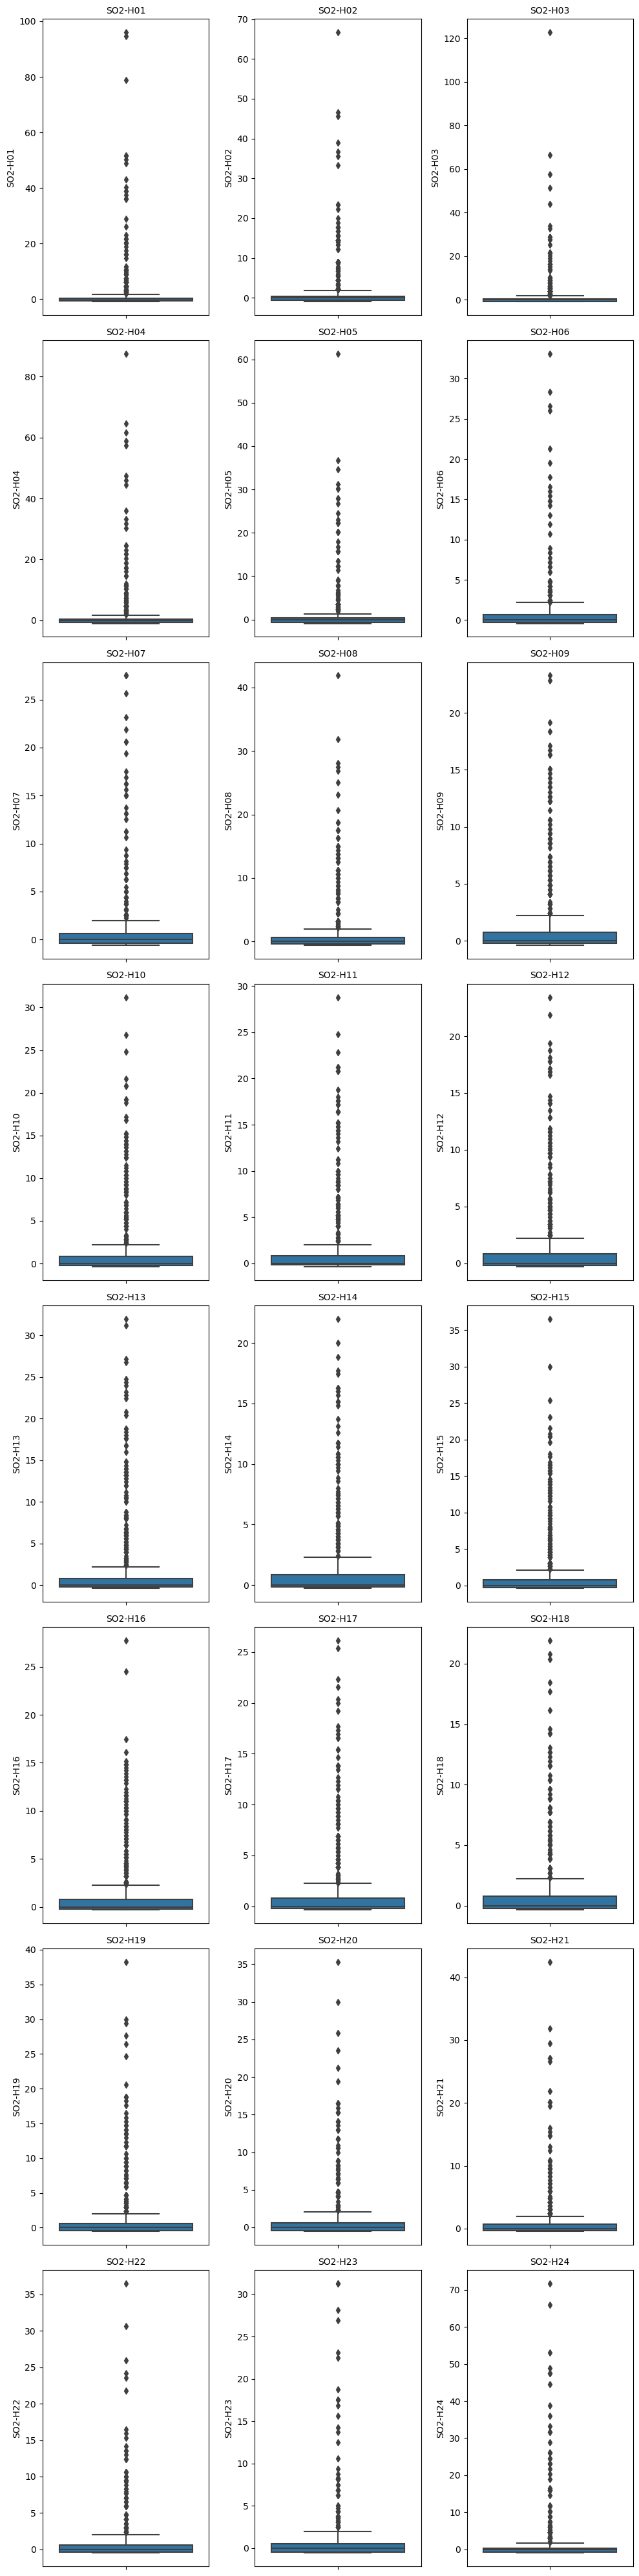

In [19]:
# Columns listed to create box plots.
columns_p = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

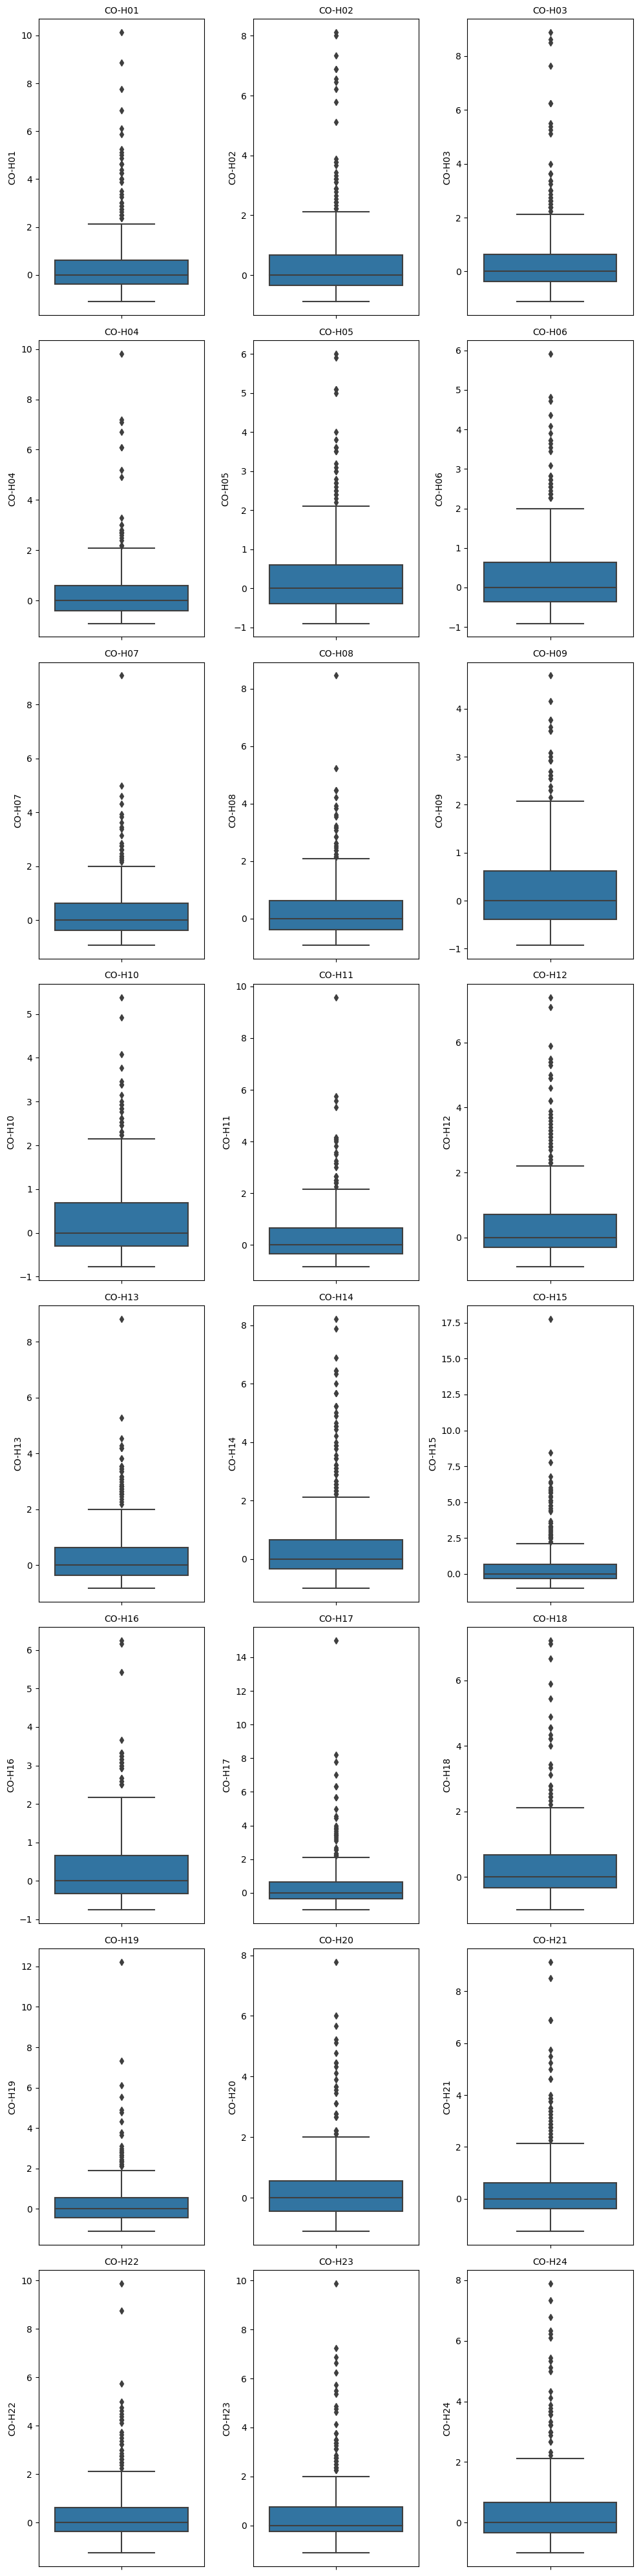

In [20]:
# Columns listed to create box plots.
columns_p = ['CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

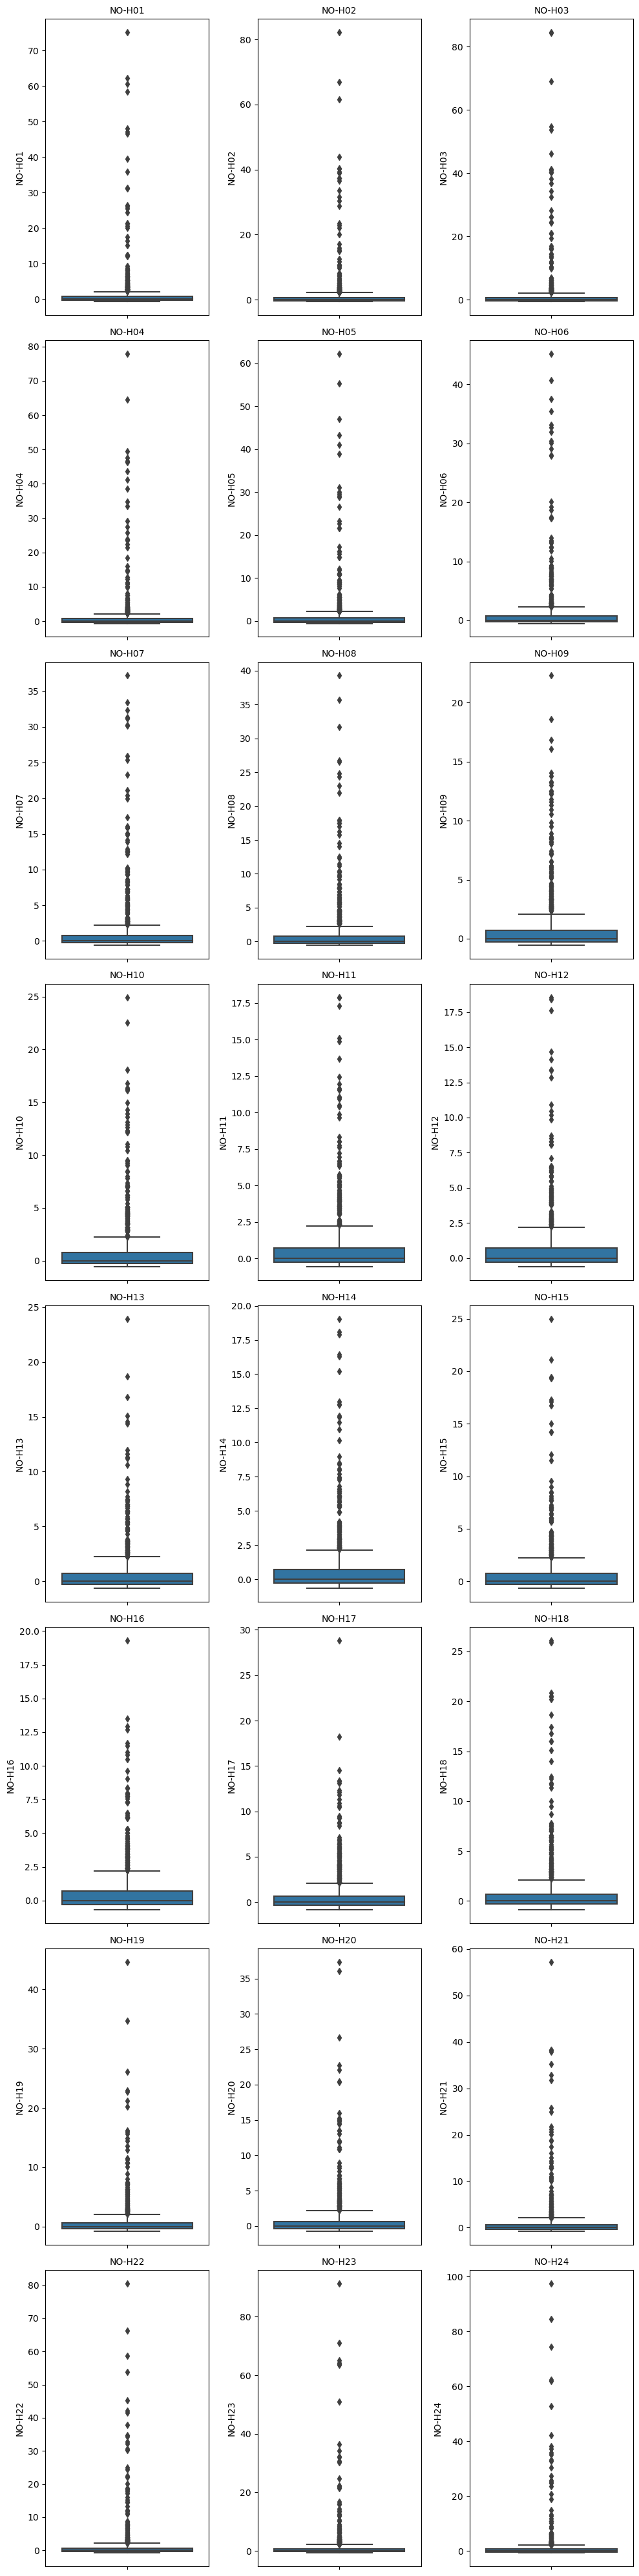

In [21]:
# Columns listed to create box plots.
columns_p = ['NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

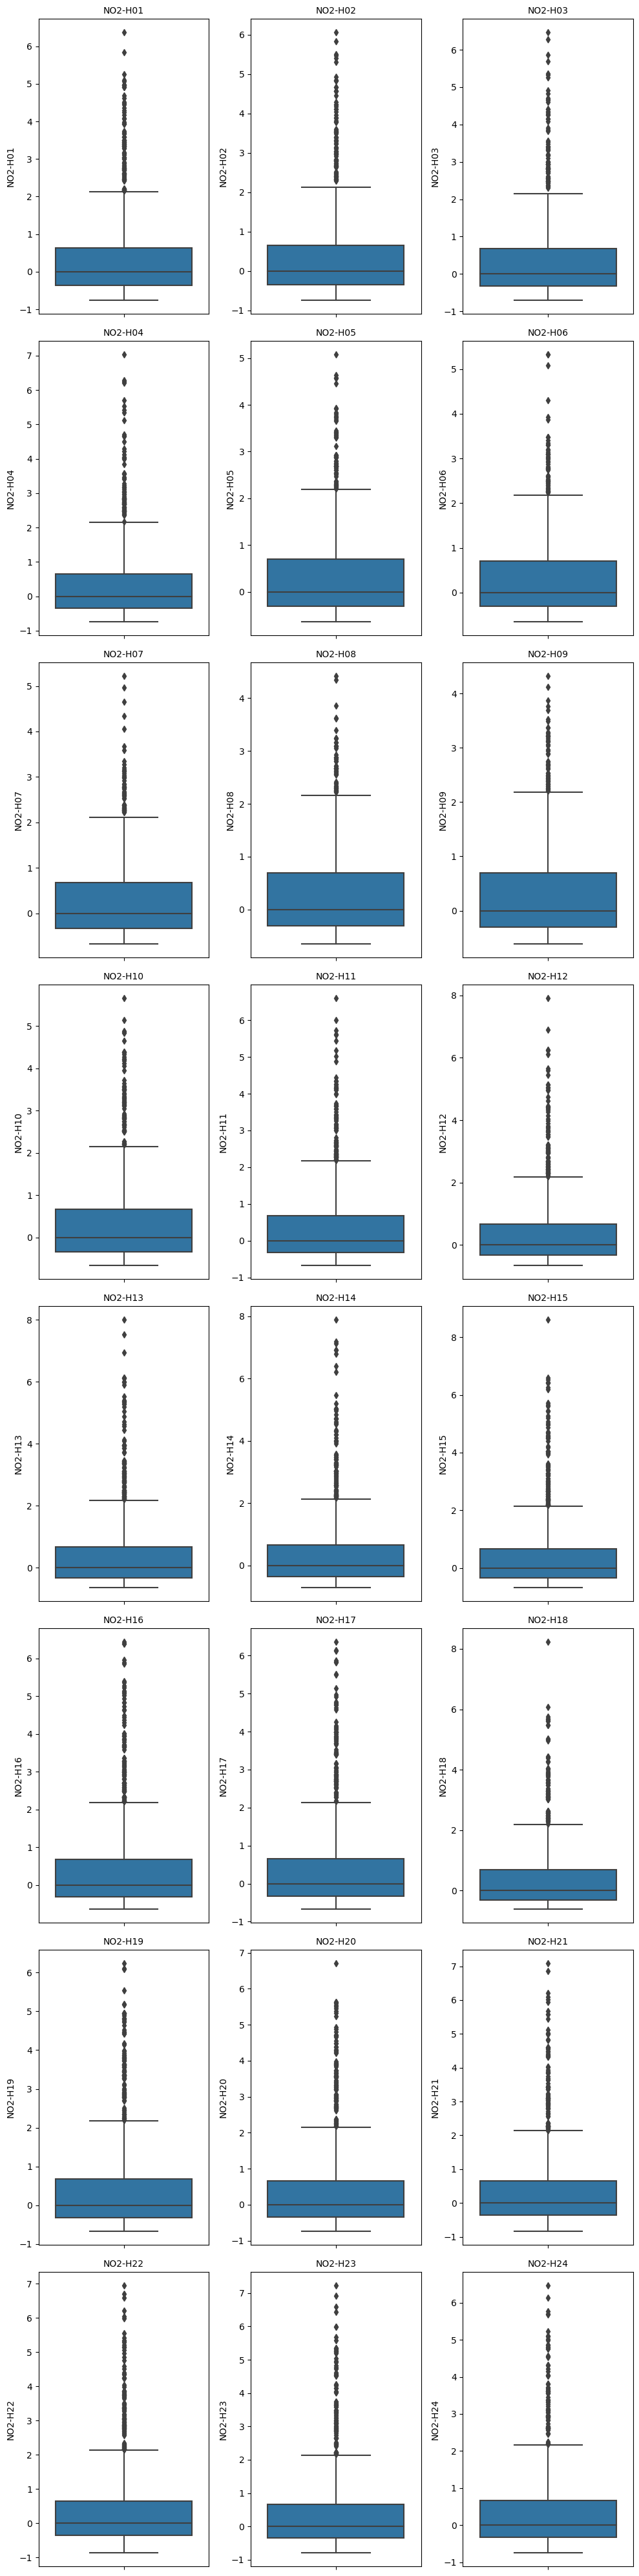

In [22]:
# Columns listed to create box plots.
columns_p = ['NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p// num_c)  #find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

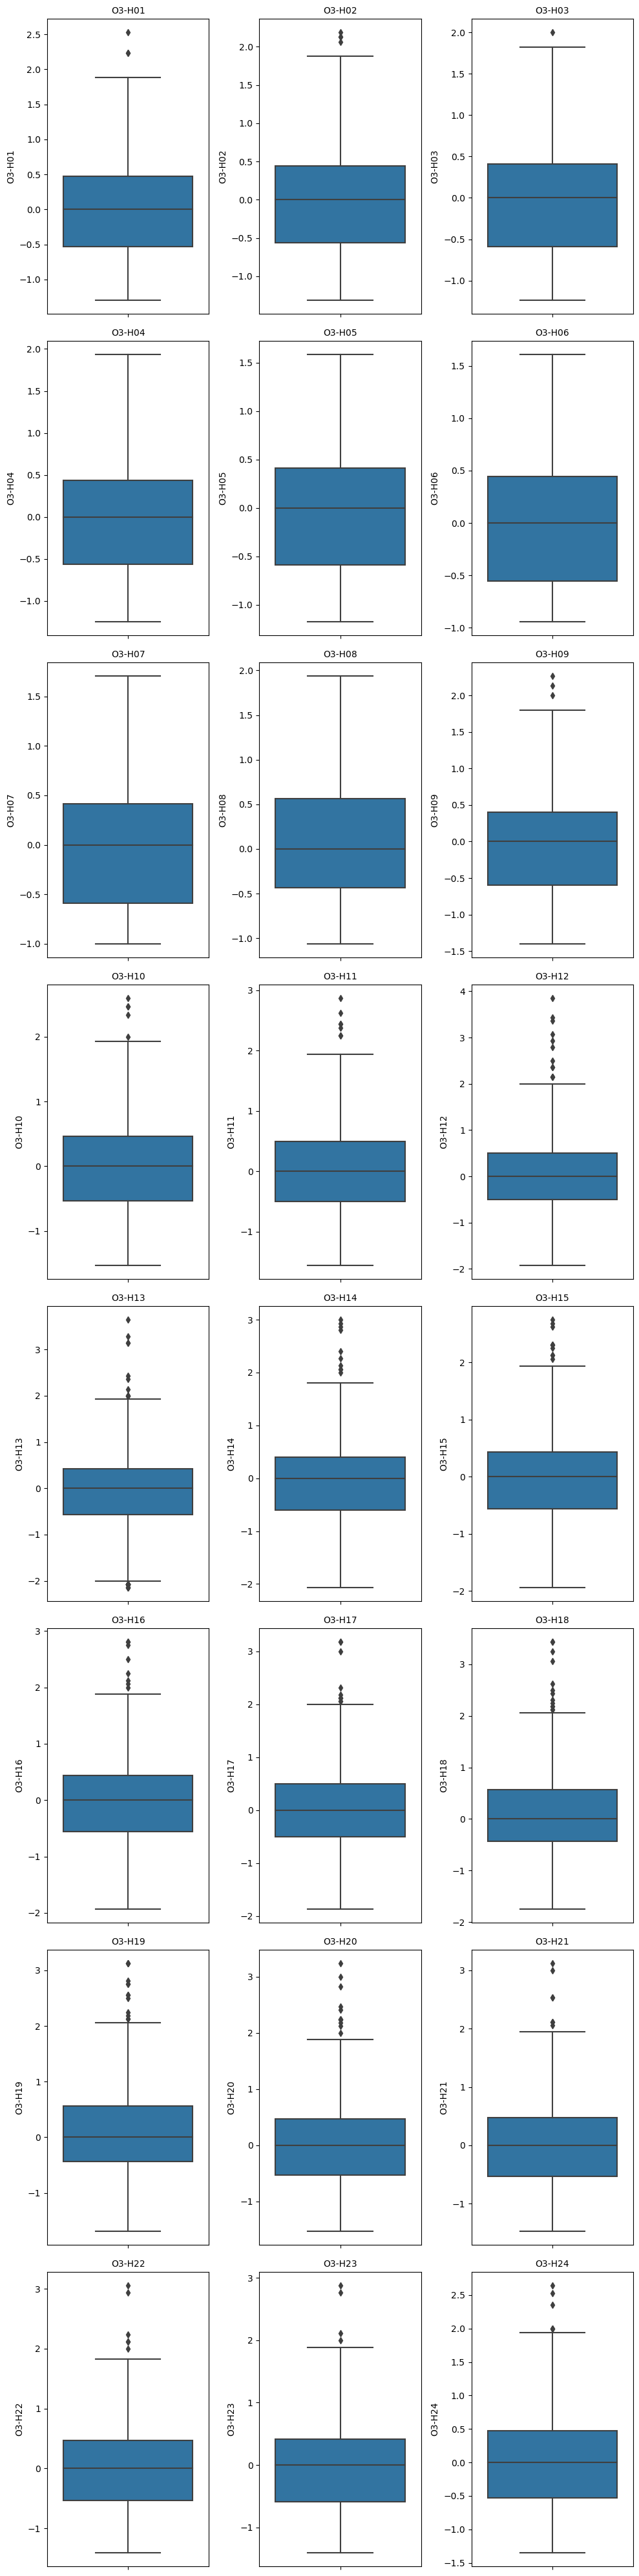

In [23]:
# Columns listed to create box plots.
columns_p = ['O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

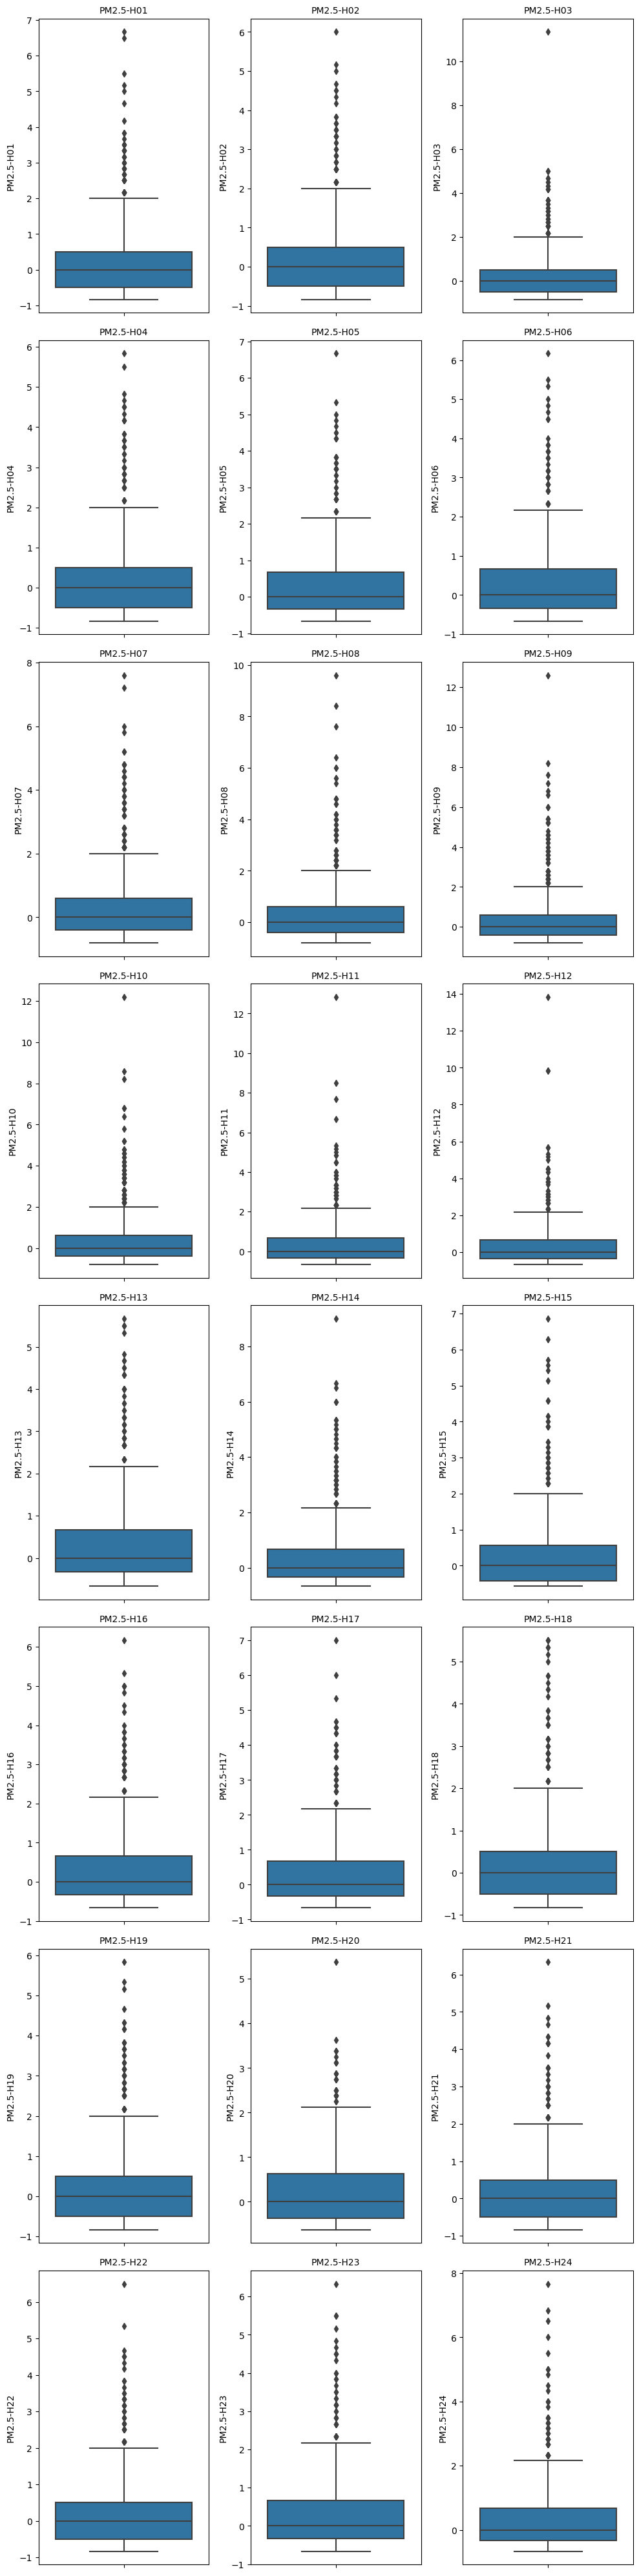

In [24]:
# Columns listed to create box plots.
columns_p = ['PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3 # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

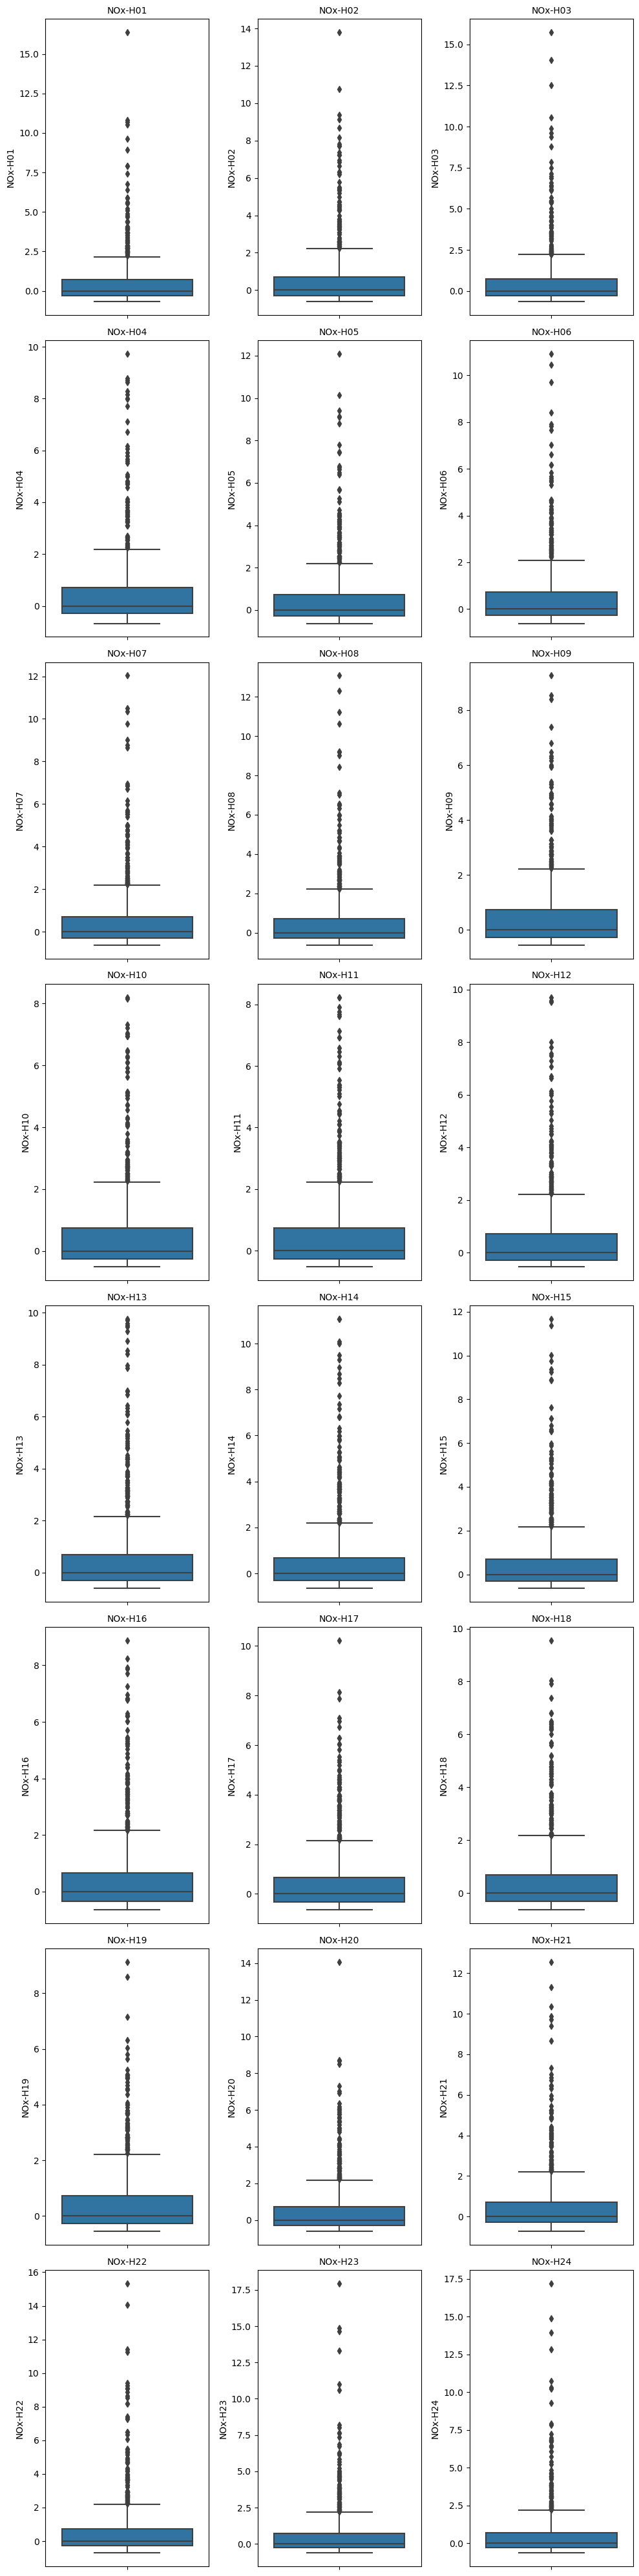

In [25]:
# Columns listed to create box plots.
columns_p = ['NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()